# k-최근접 이웃 회귀

k-최근접 이웃 알고리즘을 회귀에 적용하는 것이다. 샘플의 가장 가까운 이웃 k개의 평균값으로 예측한다.

---

농어의 길이로 무게를 예측하는 문제를 k-최근접 이웃 회귀로 구해보자

In [ ]:
## 데이터 준비

import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
# 사이킷런의 입력 데이터는 2차원이므로 1차원에서 2차원으로 바꿔야 한다

# shape 속성: 배열의 크기를 튜플로 저장한다
# reshape(행의 길이, 열의 길이) 메서드: 배열의 크기를 (행의 길이, 열의 길이)로 바꾼다
# (행의 길이) 혹은 (열의 길이)를 -1로 지정하면 원소의 개수에 맞춰 알아서 크기를 바꾼다

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape)

train_input = train_input.reshape(42,1)
test_input = test_input.reshape(14,1)
print(train_input.shape)


(42,)
(42, 1)


In [ ]:
## KNeighborsRegressor 클래스: k-최근접 이웃 회귀 알고리즘을 구현한 클래스
# n_neighbors 매개변수: 이웃의 개수를 지정한다 (기본값은 5)

# fit() 메서드: 회귀 모델을 훈련시킨다
# score() 메서드: 분류 모델은 정확도 / 회귀 모델을 결정계수(R^2)를 반환한다
# 결정계수 = 1-(타깃과 예측의 차의 제곱의 합) / (타깃과 평균의 차의 제곱의 합)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064




이상적인 모델은 둘 다 비슷하게 높되 훈련 세트의 점수가 테스트 세트보다 조금 더 높다.



*   과대적합

훈련 세트에서 점수가 굉장히 좋고, 테스트 세트에서는 굉장히 나쁜 경우이다 -> 모델을 단순하게 만든다 (이웃의 개수↑)
*   과소적합

훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 너무 낮은 경우이다 -> 모델을 복잡하게 만든다 (이웃의 개수↓)



In [ ]:
## 과소적합 해결

knr.n_neighbors = 3   #이웃의 개수 5->3
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


[1033.33333333]


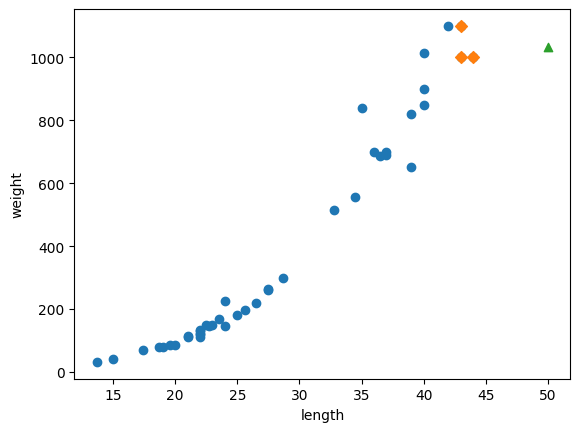

In [ ]:
## k-최근접 이웃 회귀의 한계
# 훈련 세트 범위 밖의 샘플을 예측하는 데 한계가 있다

print(knr.predict([[50]]))

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# 선형 회귀

특성과 타깃 사이의 관계를 나타내는 선형 방정식을 학습하는 회귀 알고리즘

*   y = a * x + b
*   x: 하나의 특성, y: 타깃 데이터, a: 가중치, b: 절편  

---

x를 농어의 길이, y를 농어의 무게로 하는 선형 회귀을 구해보자




In [ ]:
## LinearRegression() 클래스: 선형 회귀 알고리즘을 구현한 클래스
# LinearRegression() 클래스에도 fit(), score(), predict() 메서드가 있다

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


[39.01714496] -709.0186449535477


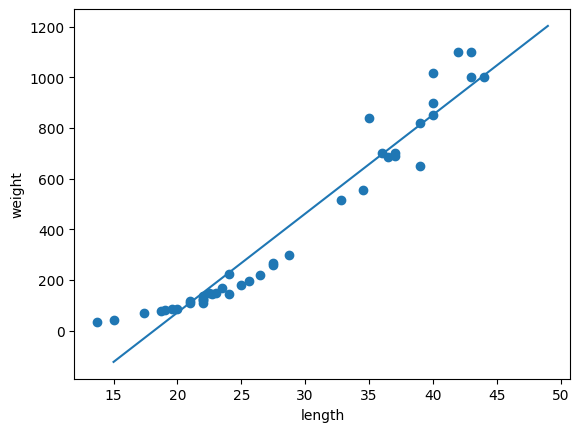

In [ ]:
## 선형 회귀의 모델 파라미터

# coef_ 속성: 선형 회귀의 기울기 속성
# intercept_ 속성: 선형 회귀의 y절편 속성

print(lr.coef_, lr.intercept_)

plt.scatter(train_input, train_target)

point = np.arange(15, 50)
plt.plot(point, point*lr.coef_ + lr.intercept_)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
## 단항 회귀의 문제점

print(lr.score(train_input, train_target), lr.score(test_input, test_target))   #훈련세트, 테스트세트 점수가 둘다 낮음
print(lr.predict([[10]]))  #무게를 음수로 예측

0.939846333997604 0.8247503123313558
[-318.84719532]


In [ ]:
## 다항 회귀
## y = a*x^2 + b*x + c 에서 모델 파라미터 a,b,c를 학습한다

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target), lr.score(test_poly, test_target))
print(lr.coef_, lr.intercept_)

0.9706807451768623 0.9775935108325122
[  1.01433211 -21.55792498] 116.0502107827827


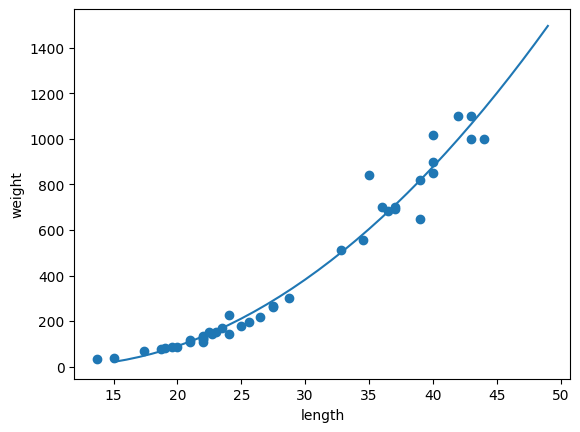

In [ ]:
## 단항 회귀의 문제점 부분적 해결

point = np.arange(15, 50)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


# 다중 회귀

여러 개의 특성을 사용하는 선형 회귀 모델이다. 특성이 많으면 선형 모델의 성능은 강력해진다. 특성을 만들거나 전처리하기 위한 다양한 클래스가 존재한다. 이를 변환기 클래스라고 한다. 변환기 클래스는 모두 fit(), transform() 메서드를 제공한다.

1.   특성 공학: 기존의 특성을 사용해 새로운 특성을 뽑아낸다
2.   정규화: 데이터를 표준점수로 바꾼다
3.   규제: 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 훼방한다

선형 회귀 모델에 규제를 추가한 모델은 릿지 회귀와 라쏘 회귀가 있다

*   릿지 회귀: 계수를 제곱한 값을 기준으로 규제를 적용한다 -> 계수의 크기를 0으로 만들 수 없다
*   라쏘 회귀: 계수의 절댓값을 기준으로 규제를 적용한다 -> 계수의 크기를 0으로 만들 수 있다

---

농어의 특성 3개로 길이를 예측하는 다중 회귀를 구해보자






In [ ]:
## 데이터 준비

# read_csv(파일 주소) 함수: 파일 주소의 csv 파일을 데이터프레임으로 변환한다
# to_numpy() 메서드: 데이터프레임을 넘파이 배열로 만든다

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

train_input[:5]

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74]])

In [ ]:
### 1. 특성 공학

## PolynomialFeatures 클래스: 주어진 특성을 조합하여 새로운 특성을 만드는 변환기 클래스
# degree 매개변수: 최고 차수를 지정한다 (기본값은 2)
# include_bias 매개변수: 상수(y절편) 특성의 포함 여부를 지정한다 (기본값은 True)

# fit(입력 데이터): 입력 데이터를 훈련한다
# transform(입력 데이터): 입력 데이터를 변환한다
# get_feature_names_out() 메서드: 각 특성의 조합을 반환한다

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

poly.get_feature_names_out()


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [ ]:
## 다중 회귀 모델 훈련

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [ ]:
## degree 매개변수가 너무 클 때 문제점: 과대적합

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


In [ ]:
### 2. 정규화

## StandardScalar 클래스: 특성을 표준점수로 바꾸는 변환기 클래스

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
### 3. 규제

# alpha 매개변수: 규제 강도를 지정한다
# alpha 매개변수↑: 규제 강도가 세짐 -> 계수의 크기를 더 줄인다 -> 과소적합 예상됨
# alpha 매개변수↓: 규제 강도가 약해짐 -> 계수의 크기를 덜 줄인다 -> 과대적합 예상됨

from sklearn.linear_model import Ridge, Lasso

In [ ]:
## 릿지 회귀

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [ ]:
## 라쏘 회귀

lasso = Lasso()
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


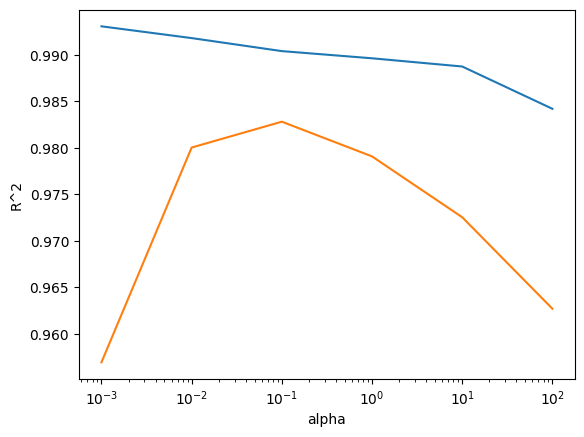

In [ ]:
## 최적의 alpha 매개변수 값 구하기
# 두 그래프가 가깝고, 두 그래프의 값이 큰 곳이 최적의 alpha 매개변수: 0.1

import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
  ridge = Ridge(alpha=a)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()